<a href="https://colab.research.google.com/github/KunalSharma2001/Data-Analysis-Projects/blob/main/NYC_Airbnb_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [5]:
nyc_logs = pd.read_csv("/content/AB_NYC_2019.csv")
nyc_logs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
nyc_logs.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Insights
---
There are 15 columns and about 48894 rows in the given dataset.
According to the .info()
The NaN/Null values in the data are:
1. Name
2. Host-Name
3. Last-Review
4. Reviews-per-month

Reasons for the missing values:
1. The host or the person might have forgetten to enter the values in the dataset.
2. Hardware or Software Errors in the collecion may affect the data.

---
Therefore, we can either remove these rows or we can fill them with the mean values of the column.



# **Identifying and Replacing the Missing Values**

In [8]:
print("Rows with missing values for Name")
print(nyc_logs['name'].isnull().value_counts())
print("\n")
print("Rows with missing value for Host_Name")
print(nyc_logs['host_name'].isnull().value_counts())
print("\n")
print("Rows with missing value for Last_Review")
print(nyc_logs['last_review'].isnull().value_counts())
print("\n")
print("Rows with missing values with Reviews_Per_Month")
print(nyc_logs['reviews_per_month'].isnull().value_counts())

Rows with missing values for Name
False    48879
True        16
Name: name, dtype: int64


Rows with missing value for Host_Name
False    48874
True        21
Name: host_name, dtype: int64


Rows with missing value for Last_Review
False    38843
True     10052
Name: last_review, dtype: int64


Rows with missing values with Reviews_Per_Month
False    38843
True     10052
Name: reviews_per_month, dtype: int64


# **Replacing Missing Values**

In [9]:
nyc_logs['reviews_per_month'] = nyc_logs['reviews_per_month'].fillna(0.0)
nyc_logs.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [10]:
print(nyc_logs['reviews_per_month'].isnull().value_counts())

False    48895
Name: reviews_per_month, dtype: int64


In [11]:
nyc_logs['last_review'] = nyc_logs['last_review'].fillna('2016-12-31')
nyc_logs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2016-12-31,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [12]:
# Checking, any NULL values in the data
nyc_logs['last_review'].isnull().value_counts()

False    48895
Name: last_review, dtype: int64

# **Deleting the Missing Values from the Data**

In [13]:
nyc_logs['name'].isnull().value_counts()

False    48879
True        16
Name: name, dtype: int64

We deleted the NULL rows in Column 'Name', as there was no values for those rows, thus we cannot depict the name and thus the whole row is of no use.

In [14]:
nyc_logs.dropna(subset=['name'], inplace = True)
nyc_logs['name'].isnull().value_counts()
# Here we have deleted the NULL values from the column = 'name'.

False    48879
Name: name, dtype: int64

In [15]:
nyc_logs['host_name'].isnull().value_counts()

False    48858
True        21
Name: host_name, dtype: int64

In [16]:
nyc_logs.dropna(subset=['host_name'], inplace=True)
nyc_logs['host_name'].isnull().value_counts()

False    48858
Name: host_name, dtype: int64

In [17]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

# **Correcting the format of Data**

In [18]:
nyc_logs['last_review'] = pd.to_datetime(nyc_logs['last_review'])

In [19]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

In [20]:
nyc_logs['host_id'] = nyc_logs['host_id'].astype(str)

In [21]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  object        
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

# **Creating New Features to add in the Data**

In [22]:
# Creating the column Month with the Name of Month
nyc_logs['month'] = nyc_logs['last_review'].apply(lambda time : time.month)

In [23]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  object        
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

In [24]:
month_name = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [25]:
nyc_logs['month'] = nyc_logs['month'].map(month_name)

In [26]:
nyc_logs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,October
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,May
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2016-12-31,0.00,1,365,December
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,July
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,November
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,June
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,October
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,June
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,July
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,June


# **Listing the Coordinated**

In [27]:
# Creaiting a DataFrame for the 'longitude and latitude'
location_logs = nyc_logs[['latitude', 'longitude']]

# Creating a list of tuples
location_logs = location_logs.to_records(index=False)

# There is now a column which have the listing named as Longitude and Latitude for the Data 
nyc_logs['listing_coordinates'] =   list(location_logs)

In [28]:
nyc_logs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,listing_coordinates
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,October,"[40.64749, -73.97237]"
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,May,"[40.75362, -73.98377]"
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2016-12-31,0.00,1,365,December,"[40.80902, -73.9419]"
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,July,"[40.68514, -73.95976]"
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,November,"[40.79851, -73.94399]"
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,June,"[40.74767, -73.975]"
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,October,"[40.68688, -73.95596]"
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,June,"[40.76489, -73.98493]"
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,July,"[40.80178, -73.96723]"
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,June,"[40.71344, -73.99037]"


# **Major Attractions in the NYC**

In [29]:
nyc_logs['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Major attractions in the NYC Neighbourhood :
Brooklyn: Brooklyn Bridge

*   Brooklyn : Brooklyn Bridge
*   Manhattan : Central Park
*   Staten Island : St. George's Ferry Terminal (Staten Island Ferry )
* Queens: Citi Field
* Bronx: Bronx Zoo

In [30]:
# Entering the coordinated of the famous attractions
brooklyn_bridge = (40.706001,-73.997002)
central_park = (40.769361,-73.977655)
citi_field = (40.75416365,-73.84082997)
staten_island_ferry = (40.643333,-74.074167) 
bronx_zoo = (40.852905,-73.872971)

In [31]:
# Dictionary with place and neighbour hood attractions
locations = {'Brooklyn':"Brooklyn Bridge", 'Manhattan':"Central Park", 'Staten Island':"St.George's  Ferry Terminal", 'Queens':"Citi Field", 'Bronx':"Bronx Zoo"}

# Dictionary with neighbourhood and coordinates
coordinates = {'Brooklyn':brooklyn_bridge, 'Manhattan':central_park, 'Queens':citi_field, 'Bronx':bronx_zoo, 'Staten Island':staten_island_ferry}

# mapping locations witht the coordinates
nyc_logs['major_attractions'] = nyc_logs['neighbourhood_group'].map(locations)
nyc_logs['major_attractions_coordinates'] = nyc_logs['neighbourhood_group'].map(coordinates)


In [32]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
# here we use haversine, it is a library in python which is used to calculate distance (in various units) between two points on Earth using their latitude and longitude.
import haversine
from haversine import haversine, Unit

In [34]:
#haversine can calculate the distance (in various units) between two points on Earth using their latitude and longitude.


# We use the lambda function to apply haversine to calculate the distance to central park from each listing in Miles
# The default units for haversine are Km but we have set it to Miles here
# x.listing_coordinates and x.major_attraction_coordinates represent the coordinates of the listing location and the major attraction
# nyc_df['distance_to_major_attractions'] = nyc_df.apply(lambda x: haversine(x.listing_coordinates,x.major_attraction_coordinates,unit=Unit.MILES), axis = 1)

nyc_logs['distance_to_majorAttractions'] = nyc_logs.apply(lambda x : haversine(x.listing_coordinates, x.major_attractions_coordinates ,unit=Unit.MILES), axis = 1)

# Rounding the values for easynes
nyc_logs['distance_to_majorAttractions'] = nyc_logs['distance_to_majorAttractions'].round(2)



# **Checking the Correlation in the Data**

<AxesSubplot:>

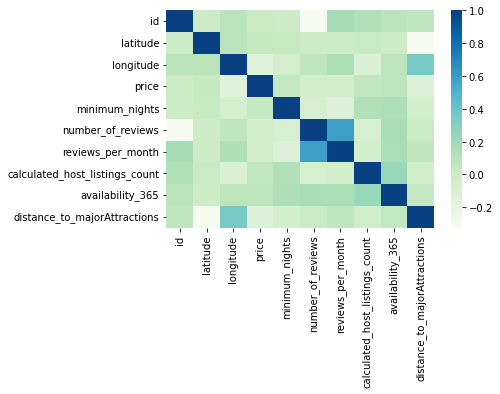

In [56]:
sns.heatmap(nyc_logs.corr(),cmap="GnBu")

# .corr(): is used to find the pairwise correlation of all the columns in the DataFrame.

In [36]:
nyc_logs['host_id'].describe()
# there are 37425 unique host in the given data, out of which the host_id = 219517861 have the maximum frequency of the listing i.e 327.

count         48858
unique        37425
top       219517861
freq            327
Name: host_id, dtype: object

In [37]:
nyc_logs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,listing_coordinates,major_attractions,major_attractions_coordinates,distance_to_majorAttractions
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,October,"[40.64749, -73.97237]",Brooklyn Bridge,"(40.706001, -73.997002)",4.24
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21,0.38,2,355,May,"[40.75362, -73.98377]",Central Park,"(40.769361, -73.977655)",1.13
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,2016-12-31,0.00,1,365,December,"[40.80902, -73.9419]",Central Park,"(40.769361, -73.977655)",3.32
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,2019-07-05,4.64,1,194,July,"[40.68514, -73.95976]",Brooklyn Bridge,"(40.706001, -73.997002)",2.43
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,2018-11-19,0.10,1,0,November,"[40.79851, -73.94399]",Central Park,"(40.769361, -73.977655)",2.68


In [61]:
nyc_logs[nyc_logs['host_id'] == '219517861'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,listing_coordinates,major_attractions,major_attractions_coordinates,distance_to_majorAttractions
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,...,0,2016-12-31,0.00,327,309,December,"[40.70637, -74.00645]",Central Park,"(40.769361, -73.977655)",4.61
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,...,1,2019-05-29,0.73,327,219,May,"[40.70771, -74.00641]",Central Park,"(40.769361, -73.977655)",4.52
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,...,1,2019-05-21,0.60,327,159,May,"[40.70743, -74.00443]",Central Park,"(40.769361, -73.977655)",4.50
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,...,8,2019-06-09,1.86,327,91,June,"[40.74792, -73.97614]",Central Park,"(40.769361, -73.977655)",1.48
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,...,14,2019-06-10,2.59,327,81,June,"[40.74771, -73.97528]",Central Park,"(40.769361, -73.977655)",1.50


In [39]:
nyc_logs['neighbourhood'].describe()
# Finding out the unique neighbourhood i.e there are 221 neighbourhoods with Williamsburg having listing of 3917 

count            48858
unique             221
top       Williamsburg
freq              3917
Name: neighbourhood, dtype: object

In [63]:
nyc_logs['neighbourhood'].value_counts().head(10)
# this represents the max times the neighbourhood freq in the given data.

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
Hell's Kitchen        1954
East Village          1852
Upper East Side       1797
Crown Heights         1563
Midtown               1545
Name: neighbourhood, dtype: int64

In [41]:
nyc_logs['neighbourhood'].value_counts().head(10).sum()
# tells about the total number of listing that the top 10 neighbourhood accounts for

23427

In [42]:
round((23427/48858)*100, 2)
# finding the % for which the top 10 neighbourhood accounts in the total data.

47.95

The top 10 neighbourhood accounts for **47.95%** of the data in the total data.

In [43]:
nyc_logs['neighbourhood_group'].describe()
# describing the most occuring meighbour_hood group in the data i.e Manhattan having listing of 21643.

count         48858
unique            5
top       Manhattan
freq          21643
Name: neighbourhood_group, dtype: object

In [44]:
nyc_logs['neighbourhood_group'].value_counts()
# reviewing the most occuring neighbourhood_group in the data, it comes out to be Manhattan with about 21643 listings.

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [45]:
nyc_logs['room_type'].describe()
# checking the room_type that is preffered most.

count               48858
unique                  3
top       Entire home/apt
freq                25393
Name: room_type, dtype: object

Mostly, Entire home/appartment is rented or taken as the room_type i.e for 25393 times

In [46]:
nyc_logs['room_type'].value_counts()

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Number of Rooms of Each Type')

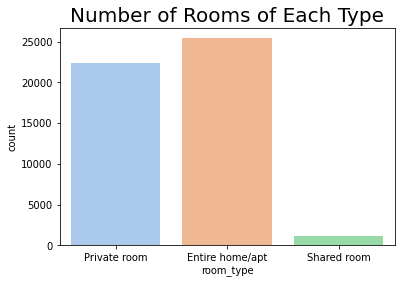

In [47]:
sns.countplot(x='room_type', data=nyc_logs, palette='pastel')
plt.title("Number of Rooms of Each Type", fontsize=20)

<AxesSubplot:xlabel='month', ylabel='count'>

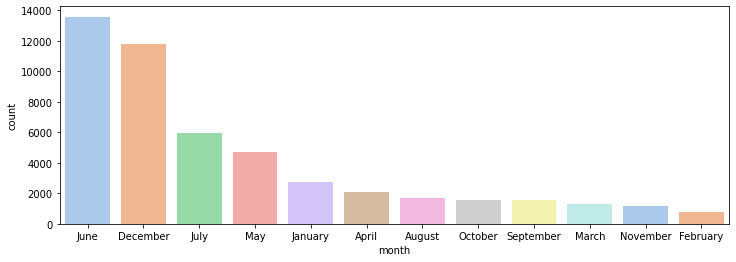

In [48]:
fig_dim = (12,4)
fig, ax = plt.subplots(figsize=fig_dim)
sns.countplot(x='month',data=nyc_logs,order = nyc_logs['month'].value_counts().index,palette='pastel')

Visualizing the data for the maximum times the rooms are booked in which time of the year.
*   The majority times the rooms are booked are in June, which indicates that maximum times people rental the rooms in June.
*   Meanwhile, the least reviews are left in Feburary, which indicates that people rent the room least in Feburary.

In [49]:
nyc_logs['availability_365'].mean()
# finding the average times the listing is available in the year, i.e 112.8 ~ 113.

112.80142453641164

In [50]:
# Identifying the average availability for each neighbourhood group (rounded to 2 decimal places)
ngbh_grp = nyc_logs.groupby('neighbourhood_group')['availability_365'].mean().round(2)

#Converting the series nbhd to a dataframe
ngbh_grp = ngbh_grp.to_frame()


#Renaming columns
ngbh_grp.rename(columns={'availability_365' : 'average_availability'}, inplace = True)


# Identifying the average price for each neighbourhood group (rounded to 2 decimal places)
ngbh_grp['average_price'] = nyc_logs.groupby('neighbourhood_group')['price'].mean().round()


# Identifying the average number of reviews per listing for each neighbourhood group (rounded to 2 decimal places)
ngbh_grp['average_number_of_reviews_per_listing'] = nyc_logs.groupby('neighbourhood_group')['number_of_reviews'].mean().round()

# Identifying the total number of reviews for each neighbourhood group(rounded to 2 decimal places)
ngbh_grp['total_number_of_reviews'] = nyc_logs.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)


ngbh_grp.sort_values(by = ['average_availability'])



,average_availability,average_price,average_number_of_reviews_per_listing,total_number_of_reviews
neighbourhood_group,,,,
Brooklyn,100.24,124.0,24.0,486174
Manhattan,112.01,197.0,21.0,454126
Queens,144.49,100.0,28.0,156902
Bronx,165.70,87.0,26.0,28334
Staten Island,199.68,115.0,31.0,11541


On average,


*   Listing in **Staten Island** have the gratest availiblty and receive the most reviews per listing.

  *   However, Staten Island also receives the least number of reviews overall.

*    Listing in **Manhattan** have the least avaliblity and receive the least reviews per listing.
  * However, Manhattan receives the second hoghest number of reviews overall.



In [51]:
nyc_logs['minimum_nights'].mean()

7.012444226124688

Average duration of Stay for all Listing is **7 days**

In [52]:
nyc_logs.groupby('neighbourhood')['minimum_nights'].mean().sort_values()


neighbourhood
Breezy Point                   1.000000
New Dorp                       1.000000
Oakwood                        1.200000
East Morrisania                1.400000
Woodlawn                       1.454545
                                ...    
Bay Terrace, Staten Island    16.500000
Vinegar Hill                  18.352941
Olinville                     23.500000
North Riverdale               41.400000
Spuyten Duyvil                48.250000
Name: minimum_nights, Length: 221, dtype: float64

Listing in the **Spuyten Duyvil** neighbourhood offer the longest average duration of stay at approx. **48 days**.

In [53]:
nyc_logs.groupby('neighbourhood_group')['minimum_nights'].mean()


neighbourhood_group
Bronx            4.564738
Brooklyn         6.057693
Manhattan        8.538188
Queens           5.182910
Staten Island    4.831099
Name: minimum_nights, dtype: float64

Listing in the **Manhattan** neighbourhood offer the longest average duration of stay at approx. **9 days**.

In [54]:
nyc_logs['distance_to_majorAttractions'].mean()

#this means that on avg, any listing is 3.001 miles away from the closest majot attraction

3.0813486020713086

In [55]:
# Identifying the average distance to the closest major attraction for each neighbourhood group (rounded to 2 decimal places)
ngbh_grp = nyc_logs.groupby('neighbourhood_group')['distance_to_majorAttractions'].mean().round(2)

#Converting the series ngbh to a dataframe
ngbh_grp = ngbh_grp.to_frame()

# Renaming columns
ngbh_grp.rename(columns={'distance_to_majorAttractions': 'average_distance_to_majorAttractions'}, inplace=True)


# Identifying the average price for each neighbourhood group (rounded to 2 decimal places)
ngbh_grp['average_price'] = nyc_logs.groupby('neighbourhood_group')['price'].mean().round()

# Identifying the average number of reviews for each neighbourhood group (rounded to 2 decimal places)
ngbh_grp['average_number_of_reviews_per_listing'] = nyc_logs.groupby('neighbourhood_group')['number_of_reviews'].mean().round()


# Identifying the total number of reviews per listing for each neighbourhood group(rounded to 2 decimal places)
ngbh_grp['total_number_of_reviews'] = nyc_logs.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)

ngbh_grp.sort_values(by=['average_distance_to_majorAttractions'])



,average_distance_to_majorAttractions,average_price,average_number_of_reviews_per_listing,total_number_of_reviews
neighbourhood_group,,,,
Bronx,2.42,87.0,26.0,28334
Manhattan,2.56,197.0,21.0,454126
Staten Island,3.12,115.0,31.0,11541
Brooklyn,3.37,124.0,24.0,486174
Queens,4.19,100.0,28.0,156902


On average,

*   Listings in the **Bronx** are the closest a major attraction in the city.
  * However, the Bronx also has the second lowest number of listings.
*   Listings in **Queens** have the least availability and receive the least reviews per listing.
*   **Manhattan** has the greatest number of listings and they are second closest to a major attraction in the city.

In [66]:
# Avg price across all the listing
avg_allListing = round(nyc_logs['price'].mean(),2)
avg_allListing

152.74

Text(0.5, 1.0, 'Reviews per month vs Price ')

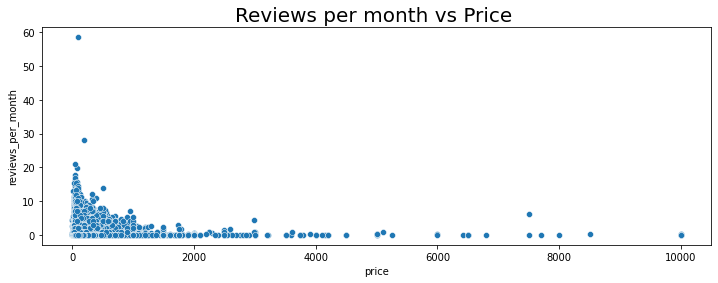

In [70]:
# visualizing the price and reviews per month
fig_sz = (12, 4) # creating the fig size for the plotting
fig, ax = plt.subplots(figsize = fig_sz)
sns.scatterplot(y = 'reviews_per_month', x = 'price', data=nyc_logs)
plt.title("Reviews per month vs Price ", fontsize = 20)


Here, we can see that the maximum number of reviews are given for the least price (0-1000), and minimum number of reviews are gives to the most expensive one i.e 10000.

In [71]:
nyc_logs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,listing_coordinates,major_attractions,major_attractions_coordinates,distance_to_majorAttractions
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,October,"[40.64749, -73.97237]",Brooklyn Bridge,"(40.706001, -73.997002)",4.24
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21,0.38,2,355,May,"[40.75362, -73.98377]",Central Park,"(40.769361, -73.977655)",1.13
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,2016-12-31,0.00,1,365,December,"[40.80902, -73.9419]",Central Park,"(40.769361, -73.977655)",3.32
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,2019-07-05,4.64,1,194,July,"[40.68514, -73.95976]",Brooklyn Bridge,"(40.706001, -73.997002)",2.43
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,2018-11-19,0.10,1,0,November,"[40.79851, -73.94399]",Central Park,"(40.769361, -73.977655)",2.68


Text(0.5, 1.0, 'Number of Reviews vs Price')

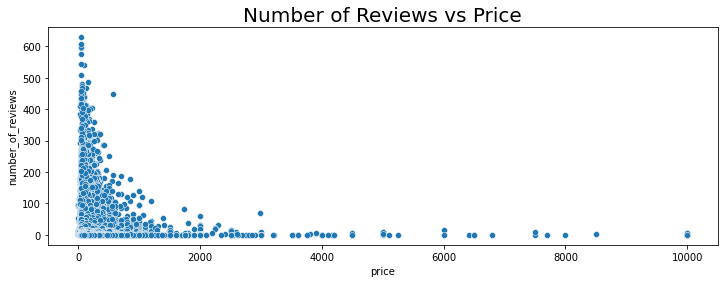

In [73]:
fig, ax = plt.subplots(figsize = fig_sz)
sns.scatterplot(y='number_of_reviews', x = 'price', data = nyc_logs)
plt.title("Number of Reviews vs Price", fontsize = 20)

The plot shows that, there are no reviews given for the least price.

In [78]:
# Finding the average price by the neighbourhood
ngbh = nyc_logs.groupby('neighbourhood')['price'].mean().round(2)

# converting the series into DataFrames
ngbh = ngbh.to_frame()

# renaming the column in the converted DataFrame
ngbh.rename(columns={'price' : 'avg_price'}, inplace = True)

# Identifying the avg number of reviews for each neighbourhood
ngbh['avg_number_of_reviews'] = nyc_logs.groupby('neighbourhood')['number_of_reviews'].mean().round(2)

ngbh.head(10)

,avg_price,avg_number_of_reviews
neighbourhood,,
Allerton,87.60,42.93
Arden Heights,67.25,7.75
Arrochar,115.00,14.62
Arverne,171.78,29.26
Astoria,117.19,21.46
Bath Beach,81.76,21.35
Battery Park City,367.09,8.41
Bay Ridge,144.43,18.57
Bay Terrace,142.00,41.50


Text(0.5, 1.0, 'Number of reviews vs Aggregated by Neighbourhood')

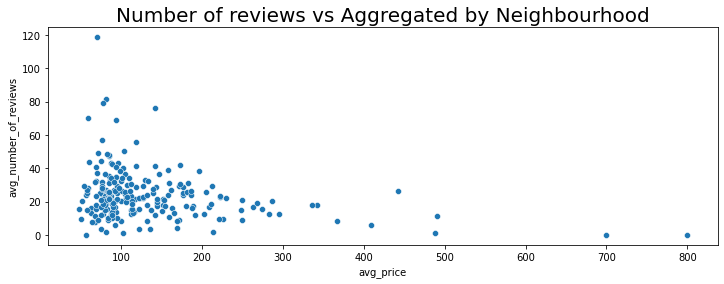

In [80]:
fig, ax = plt.subplots(figsize = fig_sz)
sns.scatterplot(y = 'avg_number_of_reviews', x = 'avg_price', data = ngbh)
plt.title("Number of reviews vs Aggregated by Neighbourhood", fontsize=20)